<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-statements" data-toc-modified-id="Import-statements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import statements</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Make-rating-categorical" data-toc-modified-id="Make-rating-categorical-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make rating categorical</a></span></li><li><span><a href="#Create-a-reasonable-dataframe-to-work-with" data-toc-modified-id="Create-a-reasonable-dataframe-to-work-with-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create a reasonable dataframe to work with</a></span></li><li><span><a href="#Run-the-Support-Vector-Classifier" data-toc-modified-id="Run-the-Support-Vector-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run the Support Vector Classifier</a></span></li></ul></div>

# Import statements

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC

In [2]:
raw_data = pd.read_csv('epi_r.csv')

# Explore

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe() # rating is a column

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

# Make rating categorical

In [7]:
raw_data['greater_orequalto_median'] = np.where(raw_data.rating >= 4.375,1,0)

In [9]:
raw_data.greater_orequalto_median.value_counts()

1    10738
0     9314
Name: greater_orequalto_median, dtype: int64

In [11]:
# Compute the correlation matrix
corr = raw_data.corr()

In [12]:
# See the correlations in descending order

core = raw_data.corr() # raw_data is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

greater_orequalto_median  greater_orequalto_median    1.0
pea                       pea                         1.0
parsnip                   parsnip                     1.0
party                     party                       1.0
pasadena                  pasadena                    1.0
passion fruit             passion fruit               1.0
passover                  passover                    1.0
pasta                     pasta                       1.0
pasta maker               pasta maker                 1.0
pastry                    pastry                      1.0
peach                     peach                       1.0
persimmon                 persimmon                   1.0
peanut                    peanut                      1.0
peanut butter             peanut butter               1.0
peanut free               peanut free                 1.0
pear                      pear                        1.0
pecan                     pecan                       1.0
pennsylvania  

In [51]:
rating_order = c1.rating.sort_values(ascending=False)

In [53]:
rating_order[:35]

rating                      1.000000
greater_orequalto_median    0.655698
drink                       0.241388
alcoholic                   0.224767
house & garden              0.217911
gin                         0.191400
spirit                      0.146625
cocktail                    0.140723
cocktail party              0.140482
bitters                     0.137368
bon appétit                 0.124549
harpercollins               0.105094
peanut free                 0.096087
soy free                    0.092965
liqueur                     0.090757
rum                         0.084689
tree nut free               0.081347
non-alcoholic               0.077476
bake                        0.076978
condiment                   0.076295
roast                       0.073499
fall                        0.067343
sauté                       0.066553
brandy                      0.065481
fortified wine              0.063814
pernod                      0.062768
créme de cacao              0.061670
d

# Create a reasonable dataframe to work with

In [54]:
raw_data_small_test = raw_data[['title','rating','greater_orequalto_median','drink','alcoholic','house & garden',
                                'gin','spirit','cocktail','cocktail party','bitters',
                                'bon appétit','harpercollins','peanut free','soy free','liqueur','rum',
                                'tree nut free','non-alcoholic','bake','condiment','roast','fall',
                                'sauté','brandy','fortified wine','pernod','créme de cacao','dinner','weelicious',
                                'chartreuse','kosher','lime juice','winter'
                               ]]

In [56]:
raw_data_small_test

,title,rating,greater_orequalto_median,drink,alcoholic,house & garden,gin,spirit,cocktail,cocktail party,...,brandy,fortified wine,pernod,créme de cacao,dinner,weelicious,chartreuse,kosher,lime juice,winter
0,"Lentil, Apple, and Turkey Wrap",2.500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Potato and Fennel Soup Hodge,3.750,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Korean Marinated Beef,4.375,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Compute the correlation matrix
corr = raw_data_small_test.corr()

In [58]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

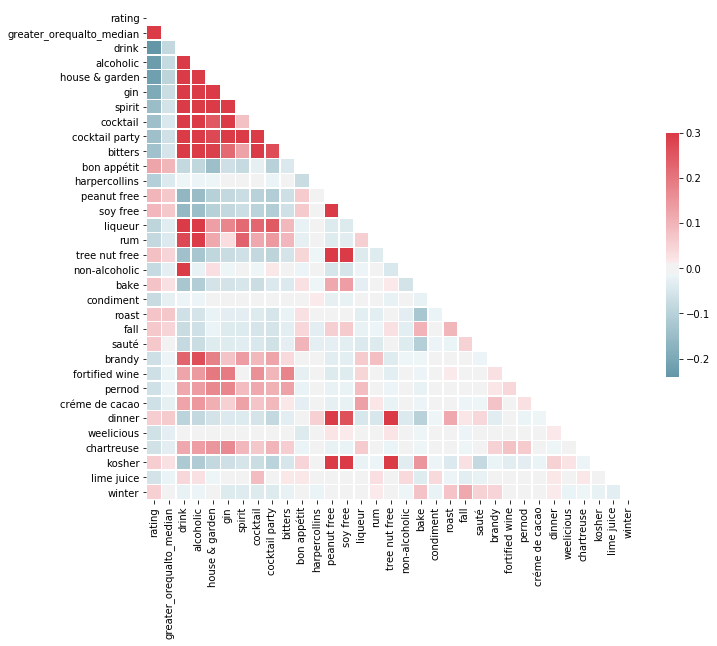

In [59]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Run the Support Vector Classifier

In [60]:
from sklearn.svm import SVC

In [ ]:
# Instantiate our model and fit the data.
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

In [61]:
# Make X the data, and Y the output variable

In [ ]:
# From...

raw_data_small_test = raw_data[['title','rating','greater_orequalto_median','drink','alcoholic','house & garden',
                                'gin','spirit','cocktail','cocktail party','bitters',
                                'bon appétit','harpercollins','peanut free','soy free','liqueur','rum',
                                'tree nut free','non-alcoholic','bake','condiment','roast','fall',
                                'sauté','brandy','fortified wine','pernod','créme de cacao','dinner','weelicious',
                                'chartreuse','kosher','lime juice','winter'
                               ]]

In [62]:
X = raw_data_small_test[['drink','alcoholic','house & garden',
                                'gin','spirit','cocktail','cocktail party','bitters',
                                'bon appétit','harpercollins','peanut free','soy free','liqueur','rum',
                                'tree nut free','non-alcoholic','bake','condiment','roast','fall',
                                'sauté','brandy','fortified wine','pernod','créme de cacao','dinner','weelicious',
                                'chartreuse','kosher','lime juice'
                               ]]

In [63]:
Y = raw_data_small_test[['greater_orequalto_median']]

In [66]:
X

,drink,alcoholic,house & garden,gin,spirit,cocktail,cocktail party,bitters,bon appétit,harpercollins,...,sauté,brandy,fortified wine,pernod,créme de cacao,dinner,weelicious,chartreuse,kosher,lime juice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Y

,greater_orequalto_median
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,0
8,1
9,0


In [67]:
svm = SVC(kernel = 'linear')
svm.fit(X, Y.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

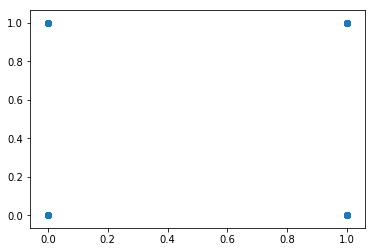

In [68]:
plt.scatter(Y.values.ravel(), svm.predict(X))

In [69]:
svm.score(X, Y.values.ravel())

0.5584480351087173

In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y.values.ravel(), cv=5)

array([0.55198205, 0.55547245, 0.55921217, 0.55735661, 0.56447992])